# **Problem 2**
Drugs are generally administered/prescribed by the physicians for a certain period of time or they are administered at regular intervals, but for various reasons patients might stop taking the treatment . Consider following example for better understanding Let’s say you get a throat infection, the physician prescribes you an antibiotic for 10 days, but you stop taking the treatment after 3 days because of some adverse events. In the above example ideal treatment duration is 10 days but patients stopped taking treatment after 3 days due to adverse events. Patients stopping a treatment is called dropoff. We want to study dropoff for “Target Drug”, the aim is to generate insights on what events lead to patients stopping on “Target Drug”. Assume ideal treatment duration for “Target Drug” is 1 year, come up with analysis showing how drop-off rate is, dropoff rate is defined as number of patients dropping off each month. Then come up with analysis to generate insights on what events are driving a patient to stop taking “Target Drug”.

In [ ]:
#import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# reading train dataset
df_train=pd.read_parquet("/content/drive/MyDrive/Akaike/Datasets/train.parquet")

In [ ]:
# Fetch target drug user
target_drug = df_train[df_train['Incident'] == 'TARGET DRUG']

In [ ]:
# Calculate dropoff rate by month
target_drug['Date'] = pd.to_datetime(target_drug['Date'])
target_drug['Month'] = target_drug['Date'].dt.month
dropoff_rates = target_drug.groupby('Month')['Patient-Uid'].nunique().diff().fillna(0)

<ipython-input-5-c480514ea544>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_drug['Date'] = pd.to_datetime(target_drug['Date'])
<ipython-input-5-c480514ea544>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_drug['Month'] = target_drug['Date'].dt.month


In [ ]:
# to analyze events driving dropp-off
dropoff_reasons = df_train[df_train['Patient-Uid'].isin(target_drug['Patient-Uid'])]
dropoff_reasons = dropoff_reasons[dropoff_reasons['Date'] < dropoff_reasons.groupby('Patient-Uid')['Date'].transform('max')]
dropoff_reasons = dropoff_reasons[dropoff_reasons['Incident'] != 'TARGET DRUG']

In [ ]:
# to calculate the frequency of each event leading to drop-off
event_freq = dropoff_reasons['Incident'].value_counts()

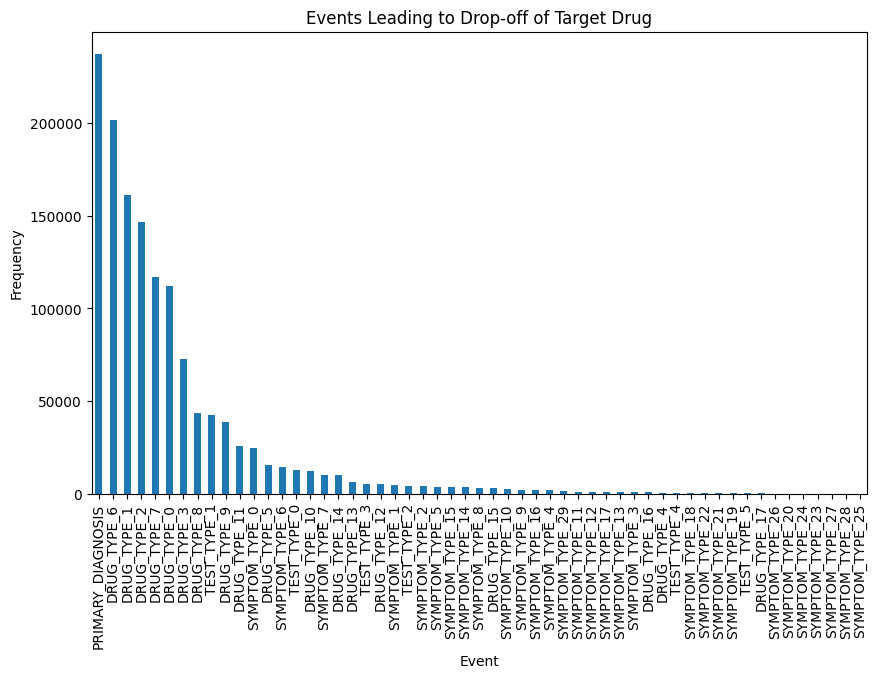

In [ ]:

# Plot the events leading to drop-off
plt.figure(figsize=(10, 6))
event_freq.plot(kind='bar')
plt.xlabel('Event')
plt.ylabel('Frequency')
plt.title('Events Leading to Drop-off of Target Drug')
plt.show()



```
=============Interpretation==========

The following medical events are more frequent by comparing other events:
1.   Primary Diagnosis
2.   Drug_Type_6
3.   Drug_Type_1
4.   Drug_Type_2
```



In [ ]:
#Calculate the day difference between dates
#sort the values
target_drug.sort_values(by=["Patient-Uid", "Date"], inplace=True)
target_drug["No.of.Days for Treatment"] = target_drug.groupby("Patient-Uid")["Date"].diff().dt.days

<ipython-input-11-35122d57d746>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_drug.sort_values(by=["Patient-Uid", "Date"], inplace=True)
<ipython-input-11-35122d57d746>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_drug["No.of.Days for Treatment"] = target_drug.groupby("Patient-Uid")["Date"].diff().dt.days


In [ ]:
#Group the data by month and Get the month from DATE column
target_drug["Month"] = target_drug["Date"].dt.to_period("M")

<ipython-input-12-f3c5c30709ab>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_drug["Month"] = target_drug["Date"].dt.to_period("M")


In [ ]:
#Calculate the drop off rate
Droprate_permonth = target_drug.groupby("Month")["No.of.Days for Treatment"].apply(lambda x: (x < 365).sum())

In [ ]:
pd.DataFrame(Droprate_permonth).head()

,No.of.Days for Treatment
Month,
2017-02,1
2017-03,2
2017-04,1
2017-05,3
2017-06,7


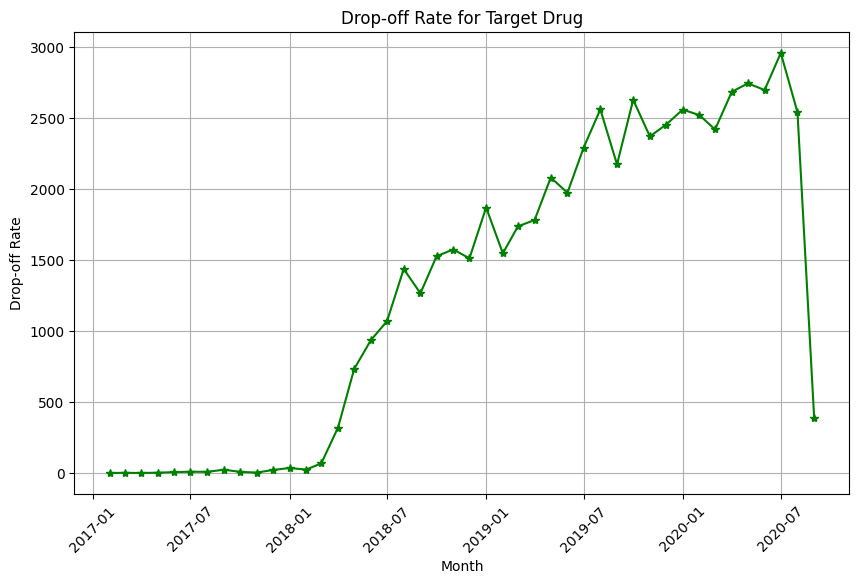

In [ ]:
#To visualize over the Droprate_permonth in line graph
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(Droprate_permonth.index.to_timestamp(), Droprate_permonth.values, marker='*',color='g')
plt.xlabel("Month")
plt.ylabel("Drop-off Rate")
plt.title("Drop-off Rate for Target Drug")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


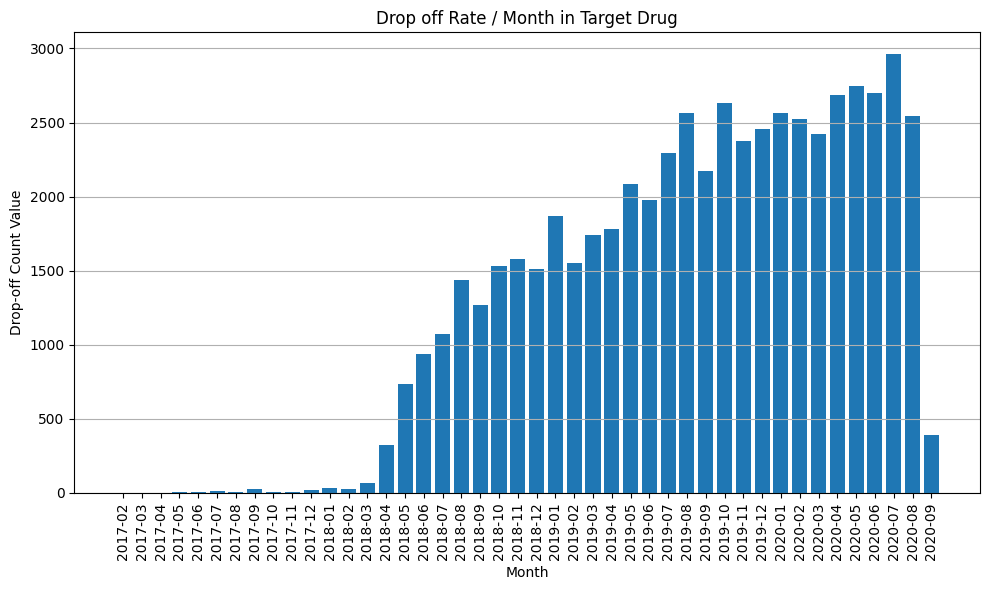

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


df_dropoff = Droprate_permonth.reset_index()
df_dropoff.columns = ['Month', 'Drop-off Count']

# Sort the DataFrame by month
dropoff_df = df_dropoff.sort_values(by='Month')

plt.figure(figsize=(10, 6))
plt.bar(range(len(df_dropoff)), df_dropoff['Drop-off Count'])
plt.xlabel('Month')
plt.ylabel('Drop-off Count Value')
plt.title('Drop off Rate / Month in Target Drug')
plt.xticks(range(len(df_dropoff)), df_dropoff['Month'],rotation =90)
plt.grid(axis='y')
plt.tight_layout()
plt.show()



```
=============Interpretation==========

From above result we can clearly understand the usage of target drug from 2018 jan onwards gradually increase upto 2020 augest

And then the sudden down fall happen after the month of august 2020.

The highest peak in dropoff-rate in July 2020 around 3000 per month
```